[En anglais](../tutorial_gdal_en/)  

![ECCC logo](https://eccc-msc.github.io/open-data/img_eccc-logo.png)  

[TOC](https://eccc-msc.github.io/open-data/readme_fr/) > [Aperçu de l'utilisation](https://eccc-msc.github.io/open-data/usage/readme_fr/) > Tutoriel GDAL en ligne de commande

# Tutoriel GDAL en ligne de commande avec des données météorologiques

## Introduction

Les données de [GeoMet du SMC](https://eccc-msc.github.io/open-data/msc-geomet/readme_fr/) et du [Datamart du SMC](https://eccc-msc.github.io/open-data/msc-datamart/readme_fr/) peuvent être manipulées via la ligne de commande utilisant [GDAL](https://gdal.org/), un bibliothèque logicielle très connue utilisée pour lire et écrire des données géospatiales matricielles et vectorielles. Dans les exemples qui suivent, vous utiliserez un fichier GeoTIFF récupéré via une requête _Web Coverage Service_ (WCS) sur GeoMet du SMC. Ce tutoriel vous montrera comment:
* Afficher la version de GDAL installée sur votre système
* Enregistrer la sortie d'une requête WCS sur votre ordinateur
* Lister les informations/metadonnées reliées au fichier matriciel
* Reprojeter un fichier matriciel
* Convertir un fichier GeoTIFF au format de fichier NetCDF
* Obtenir la valeur d'un point spécifique basé sur un emplacement en longitude/latitude

Il existe de multiples façons d'installer GDAL, veuillez vous référez au site web https://gdal.org/ pour plus d'informations.

Pour exécuter les exemples GDAL de ligne de commande, vous devez avoir une connaissance de base de l'utilisation du terminal de ligne de commande. Ces exemples fonctionnent dans un terminal bash. 

La [version interactive de ce notebook Jupyter est disponible](https://mybinder.org/v2/gh/ECCC-MSC/open-data/master?filepath=docs%2Fusage%2Ftutorial_gdal%2ftutorial_gdal_fr.ipynb).

[![badge](https://img.shields.io/badge/Interactive%20version-binder-F5A252.svg?logo=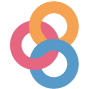)](https://mybinder.org/v2/gh/ECCC-MSC/open-data/master?filepath=docs%2Fusage%2Ftutorial_gdal%2ftutorial_gdal_fr.ipynb)

## Afficher la version de GDAL

GDAL est une suite de nombreux outils de ligne de commande. Quand vous installez GDAL, vous obtenez tous les différents outils de ligne de commande. L'outil de base est `gdalinfo`, qui peut être utilisé pour obtenir des informations relatives à votre installation de GDAL et afficher des informations sur une fichier matriciel.

In [1]:
%%bash

gdalinfo --version

GDAL 3.1.1, released 2020/06/22


## Sauvegarder une sortie de requête WCS sur le disque

Les requêtes de l'_OGC Web Coverage Service_ permettent au client de récupérer les informations de couverture d'un fichier matriciel pour une zone d'intérêt donnée. Les requêtes WCS sont effectuées sur Internet (HTTPS) et donnent à l'utilisateur plus de flexibilité lorsqu'il demande des informations sur la couverture d'une couche par rapport à la méthode plus traditionnelle de télécharger des fichiers statiques. Le _Web Coverage Service_ permet de nombreux types de requêtes, chacune d'entre elle étant décrite en plus ample détails ci-dessous. Pour plus d'informations sur les paramètres des requêtes WCS, veuillez vous référer à la [page _WCS GetCoverage_ de GeoMet du SMC](https://eccc-msc.github.io/open-data/msc-geomet/web-services_fr/#wcs-getcoverage).

Nous allons utiliser une commande `curl` pour enregistrer le résultat de la requête WCS sur le disque, le fichier sera nommé `CMC_glb_TMP.tif`. Le résultat est un fichier GeoTIFF, montrant la température (°C) d'un sous-ensemble du Système Global de Prévision Déterministe (SGPD) du SMC.

In [4]:
%%bash

curl "https://geo.weather.gc.ca/geomet?SERVICE=WCS&VERSION=2.0.1&REQUEST=GetCoverage&COVERAGEID=GDPS.ETA_TT&SUBSETTINGCRS=EPSG:4326&SUBSET=x(-120,-85)&SUBSET=y(48,66)&RESOLUTION=x(0.24)&RESOLUTION=y(0.24)&FORMAT=image/tiff" > CMC_glb_TMP.tif 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 44266  100 44266    0     0  78208      0 --:--:-- --:--:-- --:--:-- 78208


## Lister les informations à propos d'un fichier matriciel

L'outil `gdalinfo` peut être utilisé pour récupérer les métadonnées du fichier matriciel téléchargé. La sortie de la commande va lister certaines informations sur le fichier, telles que:
* Format du fichier
* Taille du fichier
* Système de coordonnées
* Métadonnées
* Informations sur la bande

In [11]:
%%bash

gdalinfo CMC_glb_TMP.tif

Driver: GTiff/GeoTIFF
Files: CMC_glb_TMP.tif
Size is 146, 75
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-119.999862068965513,66.000000000000000)
Pixel Size = (0.239724137931034,-0.240000000000000)
Metadata:
  AREA_OR_POINT=Area
  TIFFTAG_RESOLUTIONUNIT=2 (pixels/inch)
  TIFFTAG_XRESOLUTION=72
  TIFFTAG_YRESOLUTION=72
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-119.9998621,  66.0000000) (119d59'59.50"W, 66d 0' 0.00"N)
Lower Left  (-1

Il est aussi possible d'utiliser `gdalinfo` pour obtenir quelques statistiques de base sur le fichier matriciel, comme la valeur minimale et maximale en ajoutant l'option `-mm`. Notez que les valeurs résultantes sont en °C.

In [21]:
%%bash

gdalinfo -mm CMC_glb_TMP.tif | grep Min/Max

    Computed Min/Max=0.728,27.828


L'ajout de l'option `-proj4` à `gdalinfo` va produire la définition de la projection en tant qu'un chaîne de caractères proj4:

In [24]:
%%bash

gdalinfo -proj4 CMC_glb_TMP.tif | grep PROJ.4 -A 1

PROJ.4 string is:
'+proj=longlat +datum=WGS84 +no_defs'


## Reprojeter un fichier raster

En utilisant la commande `gdalwarp`, nous pouvons reprojeter un fichier matriciel. En utilisant les données de GeoMet du SMC et du Datamart du SMC, vous devez seulement fournir une définition de projection de sortie correspondant à un code EPSG, ou vous pouvez utiliser une chaîne de caractères proj4.

L'exemple suivant reprojette le fichier GeoTIFF dans une projection EPSG:3857. Le fichier de sortie est nommé `CMC_glb_TMP_epsg3857.tif`

In [25]:
%%bash

gdalwarp -t_srs EPSG:3857 CMC_glb_TMP.tif CMC_glb_TMP_epsg3857.tif

Creating output file that is 118P x 114L.
Processing CMC_glb_TMP.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


Ensuite, nous pouvons utiliser `gdalinfo` pour regarder les coordonnées et la chaîne de caractères proj4 pour s'assurer que la projection de `CMC_glb_TMP_epsg3857.tif` est réellement différente du fichier original.

In [26]:
%%bash

gdalinfo -proj4 epsg3857.tif | grep -E '(PROJ.4|Corner Coordinates:)' -A 5

PROJ.4 string is:
'+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs'
Origin = (-20037500.189506221562624,17439592.350557137280703)
Pixel Size = (19796.259162699658191,-19796.259162699658191)
Metadata:
  AREA_OR_POINT=Area
--
Corner Coordinates:
Upper Left  (-20037500.190,17439592.351) (179d59'59.74"W, 82d34' 7.50"N)
Lower Left  (-20037500.190,-17441416.294) (179d59'59.74"W, 82d34'15.13"S)
Upper Right (20030128.356,17439592.351) (179d56' 1.34"E, 82d34' 7.50"N)
Lower Right (20030128.356,-17441416.294) (179d56' 1.34"E, 82d34'15.13"S)
Center      (   -3685.917,    -911.972) (  0d 1'59.20"W,  0d 0'29.49"S)


## Convertir un fichier GeoTIFF au format de fichier NetCDF

En utilisant la commande `gdal_translate`, nous pouvons convertir un fichier matriciel de n'importe quel format supporté (`gdalinfo --formats`) en un autre format de fichier matriciel

Dans cet exemple, nous convertissons notre fichier GeoTIFF en un fichier NetCDF. Le paramètre `-of NetCDF` indique à gdal_translate dans quel format faire la projection. Le fichier de sortie sera nommé `CMC_glb_TMP.nc`

In [27]:
%%bash

gdal_translate -of NetCDF CMC_glb_TMP.tif CMC_glb_TMP.nc

Input file size is 146, 75
0...10...20...30...40...50...60...70...80...90...100 - done.


Ensuite, en utilisant `gdalinfo` nous pouvons nous assurer que le fichier NetCDF en sortie est un fichier matriciel valide.

In [29]:
%%bash

gdalinfo CMC_glb_TMP.nc

Driver: netCDF/Network Common Data Format
Files: CMC_glb_TMP.nc
Size is 146, 75
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-119.999862068965513,66.000000000000000)
Pixel Size = (0.239724137931034,-0.240000000000000)
Metadata:
  Band1#grid_mapping=crs
  Band1#long_name=GDAL Band Number 1
  Band1#_FillValue=9.96921e+36
  crs#GeoTransform=-119.9998620689655 0.2397241379310344 0 66 0 -0.24 
  crs#grid_mapping_name=latitude_longitude
  crs#inverse_flattening=298.25722356

## Obtenir la valeur pour un point spécifique basé sur un lieu en longitude/latitude

En utilisant la commande `gdallocationinfo` nous pouvons obtenir la valeur brute d'un pixel en spécifiant un emplacement en longitude/latitude ou en spécifiant une position de pixel.

Dans l'exemple suivant, nous utilisons la longitude/latitude. La valeur résultante est en °C.

In [32]:
%%bash

gdallocationinfo -wgs84 CMC_glb_TMP.tif -100 50

Report:
  Location: (83P,66L)
  Band 1:
    Value: 16.4780216217041
